# Dimensionality reduction: t-SNE (t-Distributed Stochastic Neighborhood Embedding)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

**Dimensionality reduction** is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with). Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics.

# t-SNE

It is a nonlinear dimensionality reduction technique for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

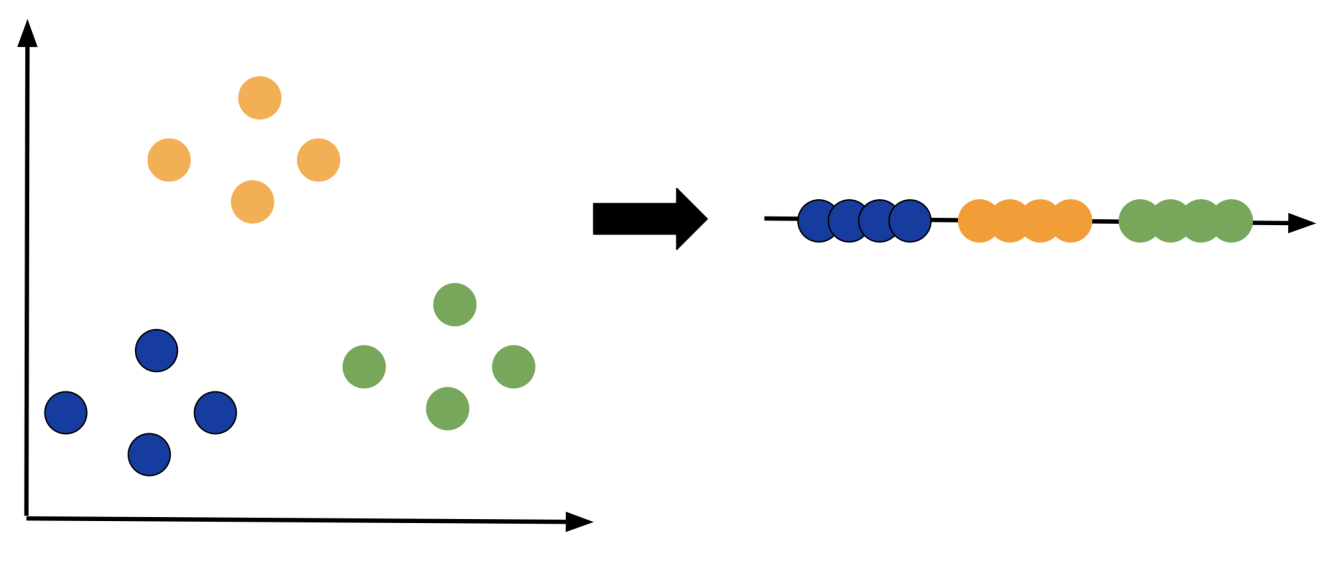

In [4]:
display_img('tsne.png', 17, 17)

The main idea is we want to pass from the left graph (2-dimensional) to the right graph (1-dimensional).

### Step 1

Compute the similarity between all the high dimensional points. The formula of the similarity of two points are (using Gaussian distribution):

$ p_{j|i} = \cfrac{exp \left( - \cfrac{||x_i - x_j||^2}{2 \cdot \sigma_i^2} \right)}{\sum_{k \neq i}exp \left( - \cfrac{||x_i - x_k||^2}{2 \cdot \sigma_i^2} \right)} $

We set $ p_{i|i} = 0 $.

### Step 2

Consider the low-dimensional points $ y_1, y_2, ..., y_n $. Compute the similarity between all the these points. The formula of the similarity of two points are (using Gaussian distribution):

$ q_{j|i} = \cfrac{exp \left( - ||y_i - y_j||^2 \right)}{\sum_{k \neq i}exp \left( - ||y_i - y_k||^2 \right)} $

We set $ q_{i|i} = 0 $.

### Step 3

We compute the cost function to minimize the mismatch between $ p_{j|i} $ and $ q_{j|i} $ using Kullback-Leibler divergence.

$ C = \sum_{i} \sum_{j} p_{j|i} \cdot log \left( \cfrac{p_{j|i}}{q_{j|i}} \right) $

### Notes 

Perplexity can be interpreted as a smooth measure of the effective number of neighbors.

# Example

In [5]:
start = time.time()

In [6]:
X = [1, 2, 2, 3, 4, 5, 5, 6, 2, 4, 3, 3]
Y = [2, 1, 3, 2, 2, 3, 1, 2, 5, 5, 4, 6]
C = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]

In [7]:
df = pd.DataFrame({'X': X, 'Y': Y, 'C': C})

In [8]:
df

,X,Y,C
0,1,2,1
1,2,1,1
2,2,3,1
3,3,2,1
4,4,2,2
5,5,3,2
6,5,1,2
7,6,2,2
8,2,5,3
9,4,5,3


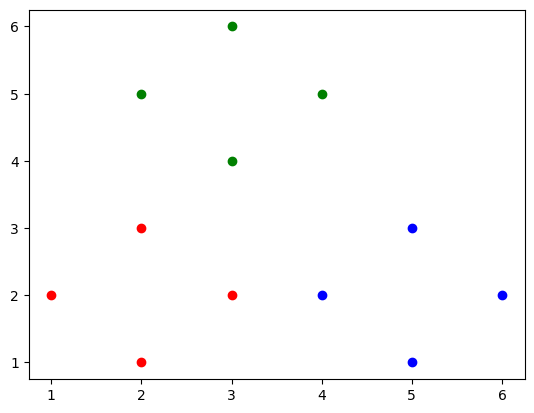

In [9]:
plt.scatter(df[df['C'] == 1]['X'], df[df['C'] == 1]['Y'], color = 'red')
plt.scatter(df[df['C'] == 2]['X'], df[df['C'] == 2]['Y'], color = 'blue')
plt.scatter(df[df['C'] == 3]['X'], df[df['C'] == 3]['Y'], color = 'green')
plt.show()

In [10]:
 from sklearn.manifold import TSNE

In [11]:
model = TSNE(n_components = 1, perplexity = 4, random_state = 0)

In [12]:
X_tsne = model.fit_transform(df[['X', 'Y']])

In [13]:
df['t_sne'] = X_tsne[:, 0]

In [14]:
df

,X,Y,C,t_sne
0,1,2,1,55.130054
1,2,1,1,-137.188919
2,2,3,1,-32.296375
3,3,2,1,612.857849
4,4,2,2,335.061249
5,5,3,2,496.706390
6,5,1,2,247.515289
7,6,2,2,419.123810
8,2,5,3,-342.969788
9,4,5,3,-518.880249


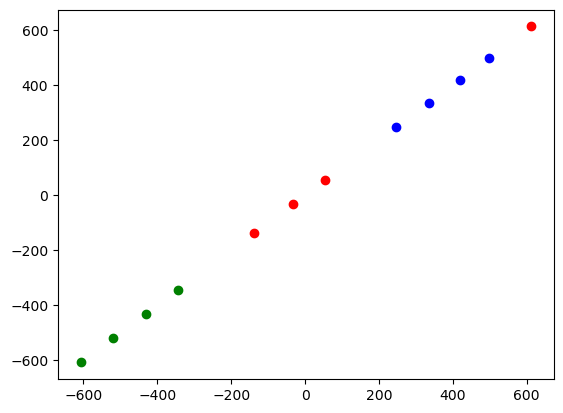

In [15]:
plt.scatter(df[df['C'] == 1]['t_sne'], df[df['C'] == 1]['t_sne'], color = 'red')
plt.scatter(df[df['C'] == 2]['t_sne'], df[df['C'] == 2]['t_sne'], color = 'blue')
plt.scatter(df[df['C'] == 3]['t_sne'], df[df['C'] == 3]['t_sne'], color = 'green')
plt.show()

### Time of execution

In [16]:
end = time.time()

In [17]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
